In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
from matplotlib import pyplot as plt

In [19]:
companies = pd.read_csv('/Users/anetasullivan/Downloads/Unicorn_Companies-2.csv')
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [20]:
companies.shape

(1074, 10)

In [21]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [22]:
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [85]:
companies["Year Founded"].value_counts().sort_values(ascending=False)

Year Founded
2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1992      1
1993      1
1990      1
1984      1
1996      1
1979      1
1991      1
1919      1
1997      1
Name: count, dtype: int64

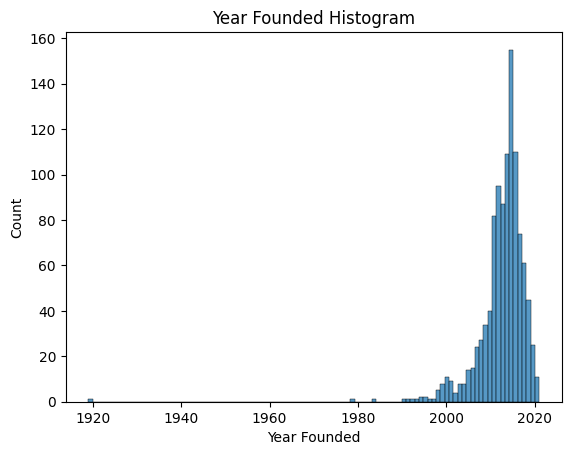

In [86]:
# Plot a histogram of the Founded Year feature.
sns.histplot(data=companies, x= 'Year Founded')
plt.title('Year Founded Histogram')

plt.show()

In [87]:
# Creating a new comlumn 'Year Joined' to have just the year when companies became unicorn company
companies['Year Joined'] = pd.to_datetime(companies['Date Joined']).dt.year
companies.head()

/var/folders/tz/ks8nm4113zq4z5n0g59b4pnr0000gn/T/ipykernel_48176/2831466162.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46


In [111]:
# Convert the 'Date Joined' to datetime
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])
companies.dtypes

/var/folders/tz/ks8nm4113zq4z5n0g59b4pnr0000gn/T/ipykernel_48176/1890828959.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
Year Joined                  int32
valuation_num                int64
dtype: object

In [112]:
# Extract the year
companies['Year Joined'] = companies['Date Joined'].dt.year

In [133]:
# How many year it took each company to become Unicorn
companies["Years to Joined"] = companies["Date Joined"].dt.year - companies["Year Founded"]
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num,Years to Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46,6


/var/folders/tz/ks8nm4113zq4z5n0g59b4pnr0000gn/T/ipykernel_48176/2040998820.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




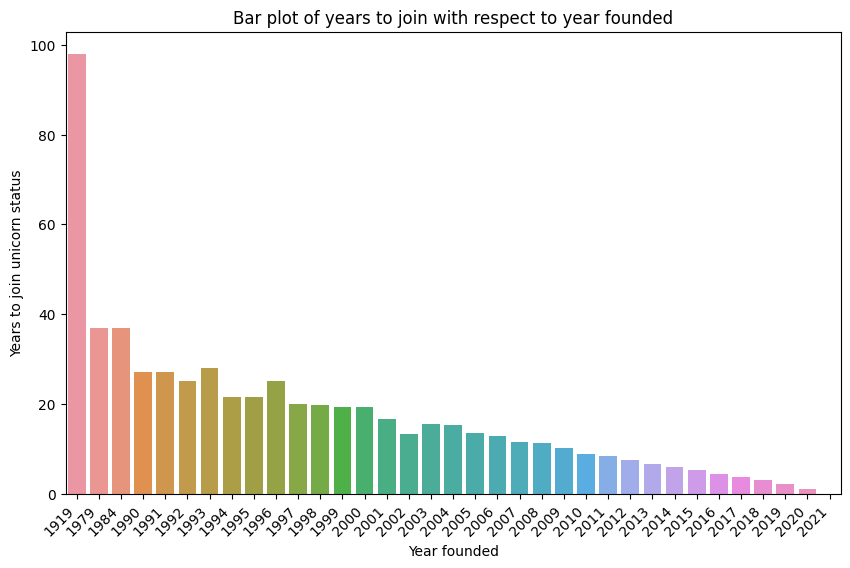

In [153]:
plt.figure(figsize=(10,6))
sns.barplot(x=companies["Year Founded"], y=companies["Years to Joined"], ci=False)

plt.title("Bar plot of years to join with respect to year founded")
plt.xlabel("Year founded")
plt.ylabel("Years to join unicorn status")
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

In [154]:
'''The data in the Valuation column is a string that starts with a $ and ends with a B 
-> this column is not in a numeric datatype, pandas cannot perform mathematical operations on its values. The data in this column needs to be converted to a numeric datatype 
-> define a function called str_to_num() that accepts as an argument'''

def str_to_num(x):
    x = x.strip('$B')
    x = int(x)

    return x

In [155]:
'''use this function to create a new column called valuation_num that represents the Valuation column as an integer value 
-> use the series method apply() to apply the str_to_num() function to the Valuation column.'''

companies['valuation_num'] = companies['Valuation'].apply(str_to_num)
companies[['Valuation', 'valuation_num']].head()

,Valuation,valuation_num
0,$180B,180
1,$100B,100
2,$100B,100
3,$95B,95
4,$46B,46


In [156]:
# How many year it took each company to become Unicorn
companies["Years to Joined"] = companies["Date Joined"].dt.year - companies["Year Founded"]
companies.head()


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num,Years to Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46,6


In [157]:
# Finding the number of missing values in each column in this dataset
companies.isna().sum()


Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
valuation_num        0
Years to Joined      0
dtype: int64

# There is a single missing value in the `Select Investors` column and 16 missing `City`

In [158]:
# Applying the `isna()` method to the `df_companies` dataframe and assign back to `mask`
mask = companies.isna()
mask.tail()


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num,Years to Joined
1069,False,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,False,False,False,False


In [159]:
# Applying the `any()` method to `mask` and assign the results back to `mask`to make a Boolean series where each element in the series represents True if a row of the dataframe contains any True values and False if any row in the dataframe contains any False values
mask = mask.any(axis=1)
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [160]:
# Applying the Boolean mask to the df_companies dataframe to return a filtered dataframe containing just the rows that contain a missing value. Assign the results to a variable called df_missing_rows
missing_rows = companies[mask]
missing_rows

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num,Years to Joined
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32,3
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4,5
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3,6
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3,9
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3,6
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2,7
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2,5
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1,2
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1,9
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1,2


# Twelve of the 17 rows with missing values are for companies from Singapore.
# to find missing data I took those steps:
    .isna() -> returns a boolean that shows every location that in NaN and True
    sum() in conjuction with isna() to get the counts of NaN values in each column 
    any() in conjuction to create a boolean mask -> just the rows with at least one NaN

# Missing values can take different forms and are usually context-specific. Not every missing value is labeled as na or None, or Null.


In [161]:
# Store the total number of values in a variable called `count_total`
count_total = companies.size
count_total

13962

In [162]:
# Removing all the rows with missing values
count_dropna_rows = companies.dropna().size
count_dropna_rows

13741

In [163]:
# Removing all the columns with missing values
count_dropna_columns = companies.dropna(axis=1).size
count_dropna_columns

11814

In [164]:
# Printing the % of values removed by dropping rows
row_percent = (count_total - count_dropna_rows)/count_total
print(f'Percentage Removed, rows: {row_percent:.3f}')

col_percent = (count_total - count_dropna_columns) / count_total
print(f'Percentage removed, columns: {col_percent:.3f}')



Percentage Removed, rows: 0.016
Percentage removed, columns: 0.154


In [165]:
# Filling missing values using the 'fillna()' method, back-filling
companies_backfill = companies.fillna(method='backfill')

# Shows the rows that previously had missing values
companies_backfill.iloc[missing_rows.index, :]


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num,Years to Joined
12,FTX,$32B,2021-07-20,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32,3
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4,5
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3,6
251,Trax,$3B,2019-07-22,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3,9
325,Amber Group,$3B,2021-06-21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3,6
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2,7
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2,5
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1,2
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1,9
848,Matrixport,$1B,2021-06-01,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1,2


# the values seem to be added without consideration of the country those cities are located in (Jacksonville in Bahamas)
# Reviewing the missing values in this dataset determines that it is fine to leave the values as they are -- this also avoids adding bias to the dataset

In [166]:
'''Your investor is interested in identifying unicorn companies in the Hardware industry in the following cities: Beijing, San Francisco, and London. They are also interested in companies in the Artificial intelligence industry in London'''

# 1. Create a Boolean mask using conditional logic
cities = ['Beijing', 'San Francisco', 'London']
mask = (
    (companies['Industry']=='Hardware') & (companies['City'].isin(cities))
) | (
    (companies['Industry']=='Artificial intelligence') & (companies['City']=='London')
)

# Applying the mask to the `companies` dataframe and assign the results to `invest`
invest = companies[mask]
invest


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num,Years to Joined
36,Bitmain,$12B,2018-07-06,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12,3
43,Global Switch,$11B,2016-12-22,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11,18
147,Chipone,$5B,2021-12-16,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5,13
845,Density,$1B,2021-11-10,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1,7
873,BenevolentAI,$1B,2015-06-02,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1,2
923,Geek+,$1B,2018-11-21,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1,3
1040,TERMINUS Technology,$1B,2018-10-25,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1,3
1046,Tractable,$1B,2021-06-16,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1,7


# 8 companies meet the criteria 

In [167]:
# Group the data by`Country/Region`
national_valuations = companies.groupby(['Country/Region'])['valuation_num'].sum().sort_values(ascending=False).reset_index()
national_valuations.head(15)

,Country/Region,valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


In [168]:
''' to meet the needs of your stakeholder -> remove the United States, China, India, and the United Kingdom -- from national_valuations and reassign the results to a variable called national_valuations_no_big4.'''
national_valuations_no_big4 = national_valuations.iloc[4:, :]
national_valuations_no_big4.head()

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


In [169]:
# Using isin() and the knowledge of pandas conditional operators and Boolean masks to accomplish the same task
mask = ~national_valuations['Country/Region'].isin(['United States', 'China', 'India', 'United Kingdom'])
national_valuations_no_big4 = national_valuations[mask]
national_valuations_no_big4.head()

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


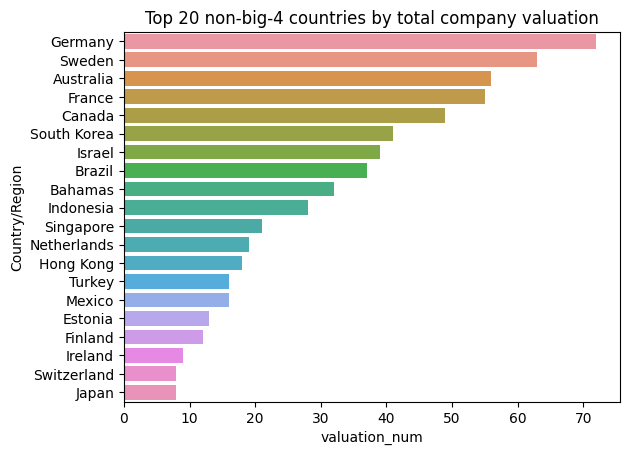

In [170]:
# Create a barplot to compare the top 20 non-big-4 countries with highest company valuations
sns.barplot(data=national_valuations_no_big4.head(20), 
            y='Country/Region',
            x='valuation_num')
plt.title('Top 20 non-big-4 countries by total company valuation')
plt.show();

In [171]:
# Plot the sum of valuations per country.

data = national_valuations_no_big4

px.scatter_geo(data, 
               locations='Country/Region', 
               size='valuation_num', 
               locationmode='country names', 
               color='Country/Region',
               title='Total company valuations by country (non-big-four)')


In [172]:
czech_companies = companies[companies['Country/Region'] == 'Czech Republic']
czech_valuation_sum = czech_companies['valuation_num'].sum()
print(czech_valuation_sum)


1


In [174]:
industry = companies.loc[companies['Industry'].isin(companies['Industry'].value_counts().index[:10])]
industryvalues = industry.groupby('Industry')['valuation_num'].mean().to_frame()
industryvalues['Count'] = industry['Industry'].value_counts()

fig = px.bar(industryvalues.sort_values('Count') ,x=industryvalues.index,y='valuation_num', text_auto='.3s',
             title='Average Valuation of the top 10 Industries',color='Count', color_discrete_sequence=px.colors.qualitative.D3)
fig.update_traces(textposition='inside',cliponaxis=False, textangle=0)
fig.show()